# Implementation 

In [100]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

# DataSet Generation

In [101]:
X,y=make_blobs(n_samples=500, centers=5,random_state=3)

In [102]:
print(X.shape)
# representing 500 samples with 2 features 

(500, 2)


In [103]:
print(y.shape)
# representing the cluster membership of each sample 

(500,)


In [104]:
print(y)
# Notice we had given centers =5. Therefore clusters assigned is 0,1,2,3,4

[3 2 1 3 3 1 4 3 2 3 2 1 2 3 1 3 2 3 3 2 0 0 3 1 3 0 4 4 1 4 3 4 0 0 3 0 2
 2 3 0 0 0 4 4 1 2 2 1 4 4 2 3 4 3 3 0 3 3 2 1 2 1 1 3 4 2 1 1 0 1 0 3 0 3
 0 1 3 4 0 0 1 0 1 4 2 4 1 2 4 1 4 0 3 0 0 2 3 1 1 0 2 0 1 1 2 2 2 1 1 3 2
 4 3 2 1 0 2 4 0 1 2 1 4 3 0 4 4 4 3 3 1 1 3 2 2 4 1 4 1 3 3 0 1 2 4 3 2 2
 3 1 3 3 1 1 2 0 0 4 1 3 0 2 4 0 2 0 2 0 0 0 4 3 0 2 0 4 3 1 2 4 2 3 2 0 4
 4 0 3 1 2 0 1 4 3 4 0 1 4 3 3 3 0 0 2 3 4 4 3 2 3 3 3 0 2 1 2 3 3 2 4 1 4
 4 0 3 1 3 1 4 0 1 1 3 0 3 0 1 2 1 0 0 2 3 3 1 1 0 2 0 3 4 2 4 3 4 4 4 4 2
 0 2 3 0 2 4 1 2 2 2 4 3 3 1 0 0 2 1 1 3 1 4 1 2 2 4 3 0 4 4 2 0 3 1 0 1 4
 1 1 2 3 0 2 0 0 3 4 0 1 0 4 3 3 1 2 0 4 2 0 1 4 2 4 3 0 4 1 1 0 0 0 3 4 0
 3 2 1 1 4 2 2 1 1 4 0 0 0 3 4 2 4 3 0 2 2 1 0 0 4 0 4 1 1 1 4 0 3 0 1 4 4
 2 3 2 4 3 4 1 2 0 2 1 3 3 2 2 0 2 0 4 1 2 4 3 3 2 1 0 4 3 3 3 4 2 0 2 2 2
 4 0 1 2 1 1 4 1 3 1 3 2 0 0 3 2 4 3 0 1 2 4 1 4 4 2 4 1 4 2 4 1 4 3 0 0 4
 0 2 0 0 4 3 3 1 4 0 1 4 1 2 1 2 3 0 1 3 1 3 3 0 3 0 4 2 2 1 3 3 4 4 2 4 4
 2 4 2 2 2 1 0 4 1 2 1 1 

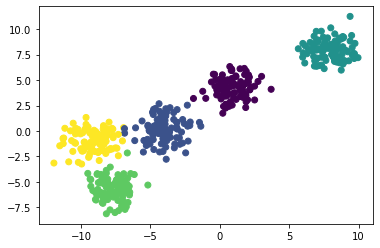

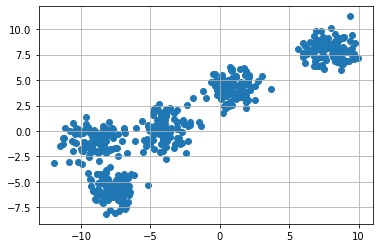

In [105]:
plt.figure(0)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()
# c means colour mapping c=y means map accordin to the y values of the clusters
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

### Our Goal - To Use K- means unsupervised algorithm to generate the clusters as shown by first graph[with different colours]

In [106]:
k=5
color=['red','yellow','orange','green','pink']
clusters={}
# k-denotes the clusters we need 
# clusters - is a empyty dictionary which will store details of all the clutsers

In [107]:
for i in range(k):
    # Generating Random Centers
    center=10*(2*np.random.random((X.shape[1],))-1)
    points=[]
    cluster={
        'center':center,
        'points':points,
        'color':color[i]
    }
    clusters[i]=cluster
# We have Created A code which will create a clusters dictionary as per details provided

In [108]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [109]:
def assignPointsToClusters(clusters):
    for ix in range(X.shape[0]):
        dist=[]
        curr_x=X[ix]
        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        current_cluster_id=np.argmin(dist)
        clusters[current_cluster_id]['points'].append(curr_x)
        

In [110]:
def plotClusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        #Plot The Points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        #Plot the Cluster Centers 
        uk=clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker='*')
    plt.show()
        

In [111]:
def updateClusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if(pts.shape[0]> 0):
            new_u=pts.mean(axis=0)
            clusters[kx]['center']=new_u
            clusters[kx]['points']=[]
        

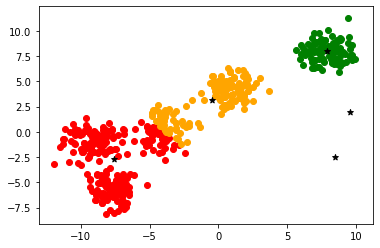

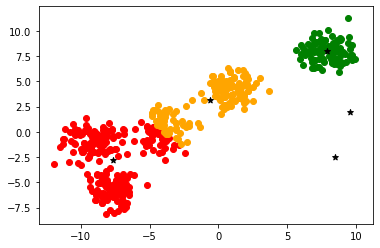

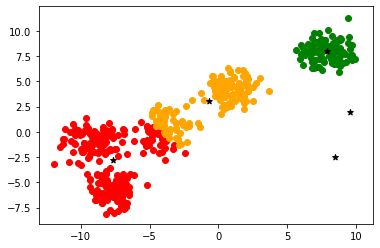

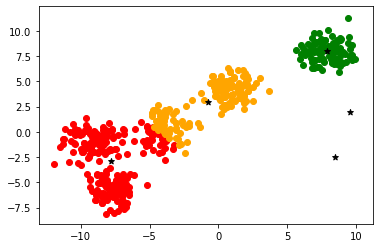

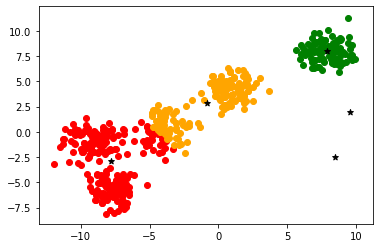

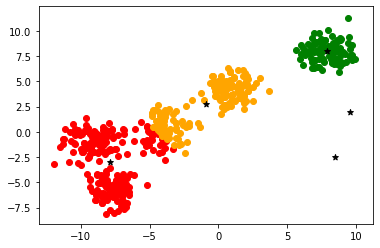

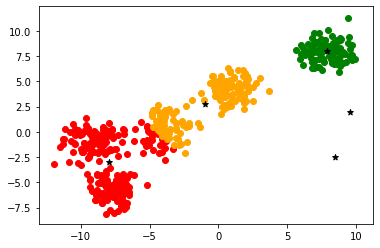

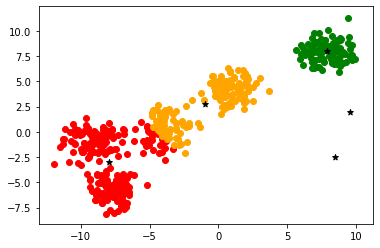

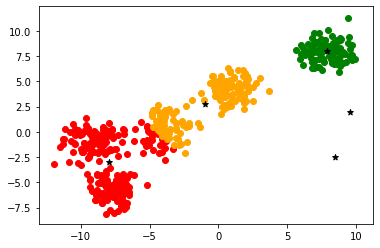

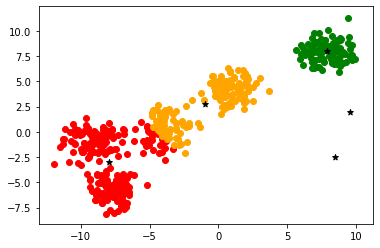

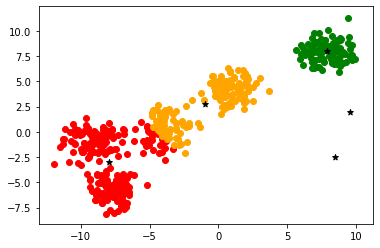

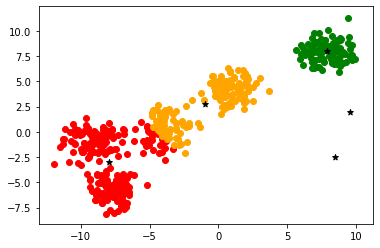

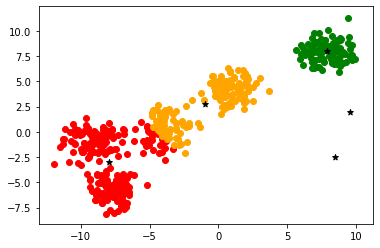

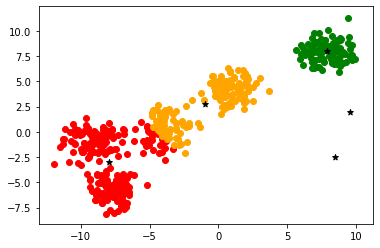

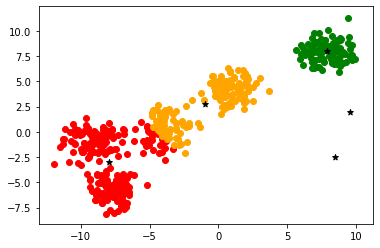

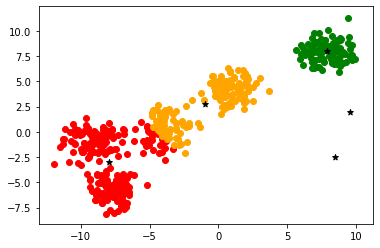

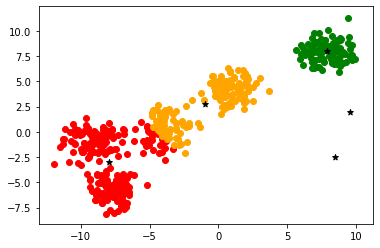

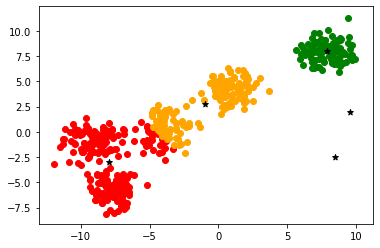

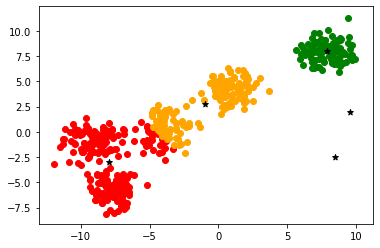

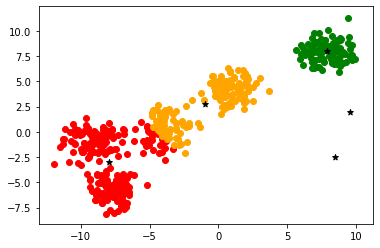

In [113]:
for i in range(20):
    assignPointsToClusters(clusters)
    plotClusters(clusters)
    updateClusters(clusters)